### Convolution neural netowrk

###### In this chapter, we will learn convolutional neural network

In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils import np_utils
import numpy as np

Using TensorFlow backend.


In [2]:
np.random.seed(10)

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [10]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1).astype('float32')

x_train_normalizer = x_train / 255
x_test_normalizer = x_test / 255

y_train_onehot = np_utils.to_categorical(y_train)
y_test_onehot = np_utils.to_categorical(y_test)

In [11]:
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [12]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5),
                padding='same', input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               200832    
__________

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
train_history = model.fit(x=x_train_normalizer, y=y_train_onehot, epochs=20, validation_split=0.2, batch_size=100, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 18s 382us/step - loss: 0.3256 - acc: 0.8998 - val_loss: 0.0696 - val_acc: 0.9793
Epoch 2/20
48000/48000 [==============================] - 6s 125us/step - loss: 0.1045 - acc: 0.9694 - val_loss: 0.0474 - val_acc: 0.9858
Epoch 3/20
48000/48000 [==============================] - 6s 126us/step - loss: 0.0766 - acc: 0.9774 - val_loss: 0.0406 - val_acc: 0.9885
Epoch 4/20
48000/48000 [==============================] - 6s 125us/step - loss: 0.0642 - acc: 0.9807 - val_loss: 0.0359 - val_acc: 0.9887
Epoch 5/20
48000/48000 [==============================] - 6s 126us/step - loss: 0.0538 - acc: 0.9835 - val_loss: 0.0332 - val_acc: 0.9903
Epoch 6/20
48000/48000 [==============================] - 6s 125us/step - loss: 0.0503 - acc: 0.9840 - val_loss: 0.0387 - val_acc: 0.9881
Epoch 7/20
48000/48000 [==============================] - 6s 124us/step - loss: 0.0432 - acc: 0.9866 - val_loss: 0.0337 -

In [14]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

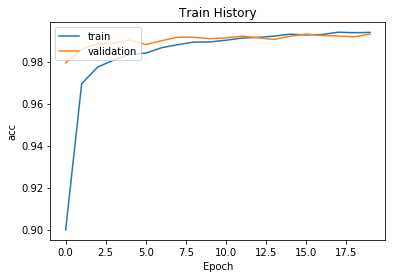

In [15]:
show_train_history(train_history, 'acc', 'val_acc')

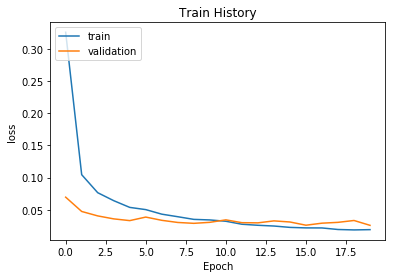

In [17]:
# Drawing the variational(变化的) curve of the cross value and validation cross value
show_train_history(train_history, 'loss', 'val_loss')

###### Evaluating this trained model's accuracy

In [18]:
scores = model.evaluate(x_test_normalizer, y_test_onehot)
print(scores) # scores[0] is loss value and scores[1] is accuracy value

10000/10000 [==============================] - 1s 115us/step
[0.02357637515367969, 0.9934]


In [20]:
# prediction our dataset
prediction = model.predict_classes(x_test_normalizer, verbose=1)

10000/10000 [==============================] - 1s 104us/step


In [21]:
print(prediction)

[7 2 1 ... 4 5 6]


In [22]:
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1 + i)
        ax.imshow(images[idx], cmap='binary')
        title = 'label=' + str(labels[idx])
        if len(prediction) > 0:
            title += ", predict = " + str(prediction[idx])
            
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx+=1
    plt.show()   

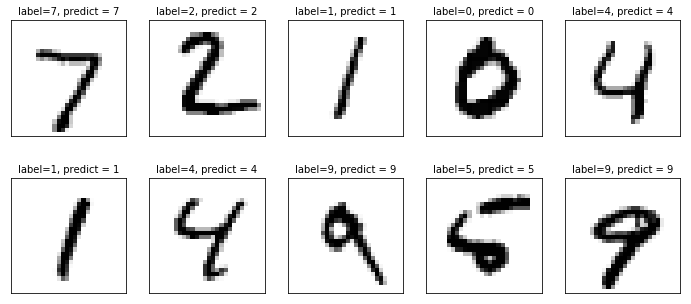

In [25]:
x_test_images = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2])
plot_images_labels_prediction(x_test_images, y_test, prediction, idx=0)

In [26]:
## show confusion matrix
import pandas as pd
pd.crosstab(y_test, prediction, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,977,0,0,0,0,0,0,0,2,1
1,0,1130,1,1,0,0,0,2,1,0
2,2,1,1026,0,0,0,0,2,1,0
3,0,0,0,1005,0,3,0,1,1,0
4,0,0,0,0,977,0,0,0,2,3
5,0,0,0,3,0,887,1,0,1,0
6,2,2,0,1,1,3,946,0,3,0
7,0,1,3,0,0,0,0,1021,1,2
8,1,0,0,2,0,1,0,0,968,2
